In [1]:
import pandas as pd

In [2]:
import numpy as np

# PROBLEM 1

In [3]:
problem1=pd.read_excel('Data set.xlsx',sheet_name='Sales data')

In [4]:
problem1

,CPI,discounts,offers,Sales
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,5,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [5]:
#to check multi-collinearity
problem1.corr()

,CPI,discounts,offers,Sales
CPI,1.000000,0.664772,-0.445300,0.901476
discounts,0.664772,1.000000,-0.816902,0.829877
offers,-0.445300,-0.816902,1.000000,-0.734167
Sales,0.901476,0.829877,-0.734167,1.000000


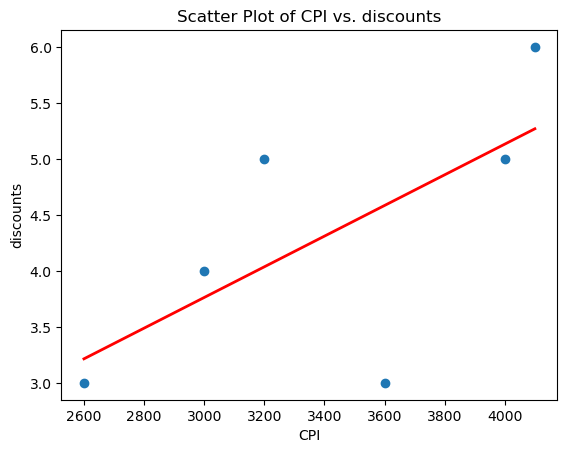

In [6]:
# assumptions of MLR
# linearity b/w variables
import matplotlib.pyplot as plt
# Create scatter plot
x=problem1['CPI']
y=problem1['discounts']
plt.scatter(x,y)

# Add labels and title
plt.xlabel('CPI')
plt.ylabel('discounts')
plt.title('Scatter Plot of CPI vs. discounts')

# Convert the data into arrays
x = np.array(x)
y = np.array(y)

# Perform linear regression
slope, intercept = np.polyfit(x, y, 1)

# Plot the regression line y=mx+c 
plt.plot(x, slope * x + intercept, color='red', linestyle='-', linewidth=2, label='Regression Line')

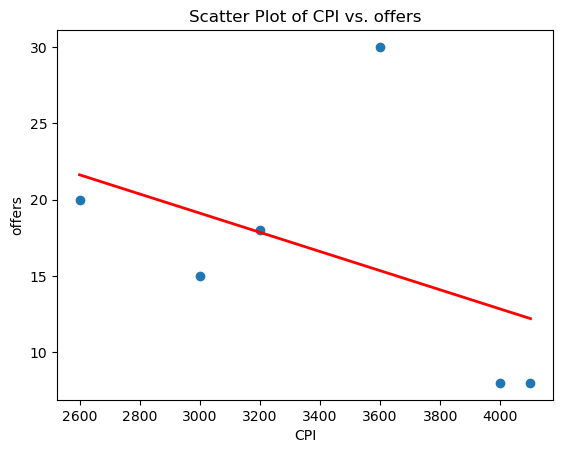

In [7]:
# Create scatter plot
x=problem1['CPI']
y=problem1['offers']
plt.scatter(x,y)

# Add labels and title
plt.xlabel('CPI')
plt.ylabel('offers')
plt.title('Scatter Plot of CPI vs. offers')
# Convert the data into arrays
x = np.array(x)
y = np.array(y)

# Perform linear regression
slope, intercept = np.polyfit(x, y, 1)

# Plot the regression line y=mx+c 
plt.plot(x, slope * x + intercept, color='red', linestyle='-', linewidth=2, label='Regression Line')

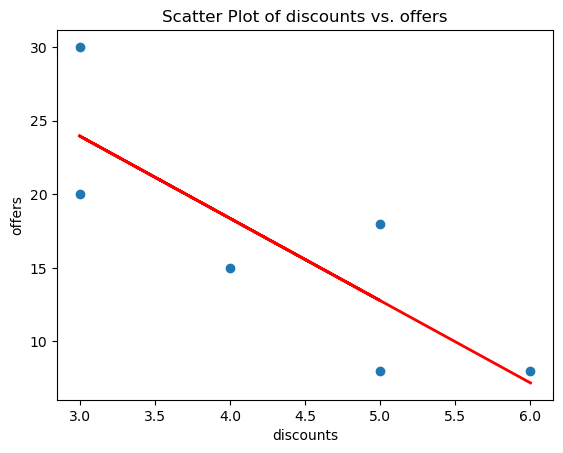

In [8]:
# Create scatter plot
x=problem1['discounts']
y=problem1['offers']
plt.scatter(x,y)

# Add labels and title
plt.xlabel('discounts')
plt.ylabel('offers')
plt.title('Scatter Plot of discounts vs. offers')
# Convert the data into arrays
x = np.array(x)
y = np.array(y)

# Perform linear regression
slope, intercept = np.polyfit(x, y, 1)

# Plot the regression line y=mx+c 
plt.plot(x, slope * x + intercept, color='red', linestyle='-', linewidth=2, label='Regression Line')

In [9]:
# Multiple Linear Regression 
import statsmodels.formula.api as smf
model=smf.ols(data=problem1,formula="Sales~CPI+discounts+offers")
result=model.fit()
result.summary()

C:\Users\babyk\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     13.14
Date:                Fri, 26 Jan 2024   Prob (F-statistic):             0.0716
Time:                        19:44:33   Log-Likelihood:                -68.476
No. Observations:                   6   AIC:                             145.0
Df Residuals:                       2   BIC:                             144.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.648e+05   1.64e+05      1.613      0.248   -4.41e+05    9.71e+05
CPI          128.4351     39.639      3.240      0.083     -42.120     298.990
discounts   5913.5196   2.99e+04      0.198      0.861   -1.23e+05    1.34e+05
offers     -4902.5460   3641.815     -1.346      0.311   -2.06e+04    1.08e+04
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.185
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.238
Skew:                          -0.031   Prob(JB):                        0.888
Kurtosis:                       2.026   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# Given below information find out the Sales that has
# 5000 cpi , 3 percentage discounts, 20 rewards offers
# 4000 cpi , 8 percentage discounts, 19 rewards offers
# Create a new DataFrame for prediction
new_data = pd.DataFrame({
    'CPI': [5000, 4000],
    'discounts': [3, 8],
    'offers': [20, 19]
})

# Make the prediction
predictions = result.predict(new_data)
print(predictions)

0    826645.348382
1    732680.364860
dtype: float64


# PROBLEM 2


In [11]:
problem2=pd.read_excel('Data set.xlsx',sheet_name='Loan data')

In [12]:
len(problem2)

1340

In [13]:
problem2.head()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [14]:
problem2.isnull().sum()

Cutomer id       0
Cards           12
Debit card      41
Insurance       48
Age            189
Cibil Score      0
Loan offer       0
dtype: int64

C:\Users\babyk\AppData\Local\Temp\ipykernel_17620\2242173173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(problem2["Age"])
C:\Users\babyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\babyk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tru

<Axes: xlabel='Age', ylabel='Density'>

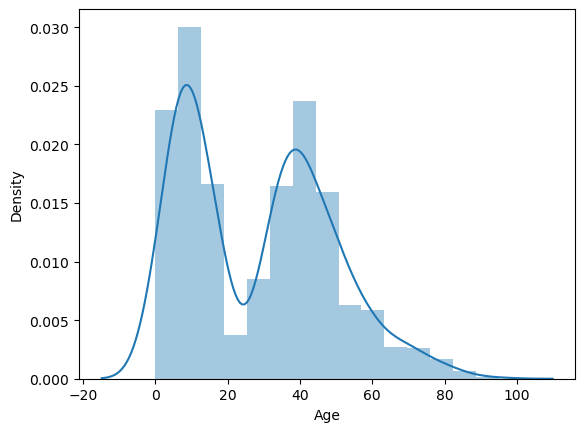

In [15]:
import seaborn as sns
sns.distplot(problem2["Age"])

In [16]:
#since age is right skewed its better to choose median replacement instead of mean
problem2["Age"]=problem2["Age"].fillna(problem2["Age"].median())

In [17]:
print("Insurance:",problem2["Insurance"].unique(),"\n","Debit card:",problem2["Debit card"].unique(),"\n","Cards:",problem2["Cards"].unique())
#  this shows variables (Insurance,Debit card,	Cards has binary values (0,1) so its better to go with mode replacement to treat null values)

Insurance: [ 0.  1. nan] 
 Debit card: [ 1.  0. nan] 
 Cards: [ 0.  1. nan]


In [18]:
print(problem2["Insurance"].mode(),"\n",problem2["Debit card"].mode(),"\n",problem2["Cards"].mode())

0    0.0
Name: Insurance, dtype: float64 
 0    1.0
Name: Debit card, dtype: float64 
 0    1.0
Name: Cards, dtype: float64


In [19]:
problem2["Cards"].mode()

0    1.0
Name: Cards, dtype: float64

In [20]:
problem2["Insurance"]=problem2["Insurance"].fillna(0.0)
problem2["Debit card"]=problem2["Debit card"].fillna(1.0)
problem2["Cards"]=problem2["Cards"].fillna(1.0)

In [21]:
problem2.isnull().sum()

Cutomer id     0
Cards          0
Debit card     0
Insurance      0
Age            0
Cibil Score    0
Loan offer     0
dtype: int64

In [22]:
problem2.head()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [23]:
problem2["Loan offer"].unique()

array([0, 1], dtype=int64)

In [24]:
#since target value is binary,Logistic regression is best suitable for this
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [26]:
x=problem2.drop(["Loan offer","Cutomer id"],axis="columns")

In [27]:
x.head()

,Cards,Debit card,Insurance,Age,Cibil Score
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [28]:
y=problem2["Loan offer"]

In [29]:
y.head(2)

0    0
1    1
Name: Loan offer, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
lr.fit(x_train,y_train)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

LogisticRegression()

In [33]:
y_pred=lr.predict(x_test)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       136
           1       0.72      0.77      0.74       132

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix
cm(y_test,y_pred)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

array([[ 97,  39],
       [ 31, 101]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

0.7388059701492538

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Text(0, 0.5, 'True Positive Rate')

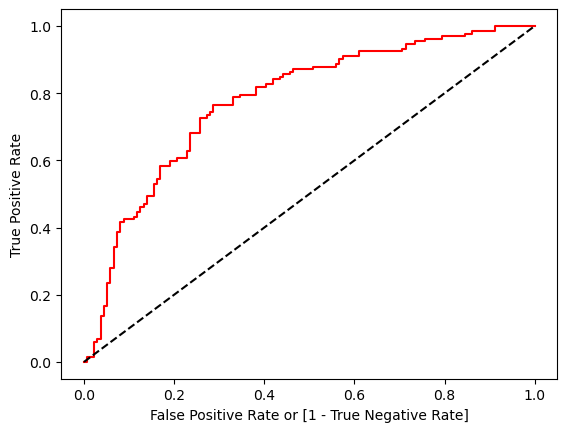

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc=roc_auc_score(y_test,y_pred)
fpr,tpr,threshold=roc_curve(y_test,lr.predict_proba(x_test)[0:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')      

In [38]:
import statsmodels.api as sm 
x=sm.add_constant(x)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
Model=sm.Logit(y_train,x_train)

In [41]:
res=Model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.588809
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Loan offer   No. Observations:                 1072
Model:                          Logit   Df Residuals:                     1066
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                  0.1503
Time:                        19:44:35   Log-Likelihood:                -631.20
converged:                       True   LL-Null:                       -742.87
Covariance Type:            nonrobust   LLR p-value:                 2.878e-46
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0659      0.257     -0.256      0.798      -0.570       0.439
Cards           0.3439      0.137      2.516      0.012       0.076       0.612
Debit card      0.6310      0.242      2.609      0.009       0.157       1.105
Insurance      -0.5849      0.591     -0.989      0.323      -1.744       0.574
Age             0.0048      0.004      1.331      0.183      -0.002       0.012
Cibil Score    -0.4031      0.036    -11.078      0.000      -0.474      -0.332
===============================================================================
"""

# problem3 Decision Tree , Random forest , KNN , kmeans and SVM

In [42]:
pro3=pd.read_excel('Data set.xlsx',sheet_name='customer data')

In [43]:
pro3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
pro3.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [45]:
pro3.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [46]:
pro3.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [47]:
pro3["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [48]:
pro3.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [49]:
pro3.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [50]:
pro3.sex.unique()

array(['Male', 'Female'], dtype=object)

In [51]:
pro3.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [52]:
pro3.income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [53]:
pro3["income"] = pro3["income"].replace('>50K.', '>50K')

In [54]:
pro3["income"] = pro3["income"].replace('<=50K.', '<=50K')

In [55]:
pro3['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

# null imputation


In [56]:
pro3['native-country']=pro3['native-country'].bfill()

In [57]:
pro3['occupation']=pro3['occupation'].ffill()

In [58]:
pro3['workclass']=pro3['workclass'].bfill()

In [59]:
pro3.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [60]:
x=pro3
x=x.drop("income",axis="columns")

In [61]:
x.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [62]:
y=pro3.income

In [63]:
y[0:3]

0    <=50K
1    <=50K
2    <=50K
Name: income, dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([0, 0, 0, ..., 0, 0, 1])

In [65]:
x = pd.get_dummies( x , columns = ['workclass','education','occupation','marital-status','race'
                                  ,'native-country','relationship'],dtype=int)

In [66]:
x['sex']=le.fit_transform(x['sex'])

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [67]:
x.head(2)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,77516,13,1,2174,0,40,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier(n_neighbors=10)

In [70]:
y_pred = knn.predict(x_test)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7942471081994062

In [72]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[7188,  193],
       [1817,  571]], dtype=int64)

In [73]:
import seaborn as sns

Text(58.222222222222214, 0.5, 'Truth')

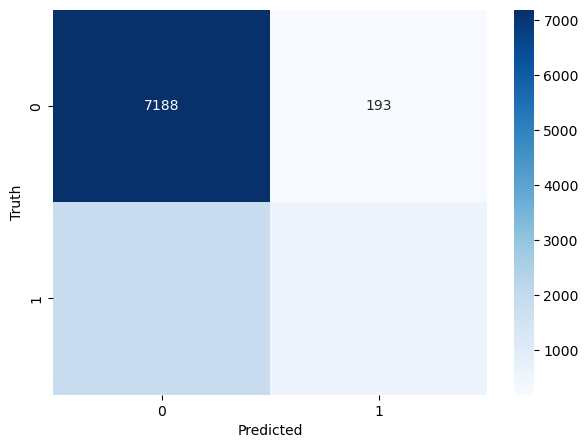

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# decision tree

In [75]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [76]:
model_d = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model_d.fit(x_train,y_train)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [77]:
y_pred=model_d.predict(x_test)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [78]:
accuracy_score(y_test,y_pred)

0.7994677039615109

In [79]:
cmd=confusion_matrix(y_test,y_pred)
cmd

array([[7369,   12],
       [1947,  441]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

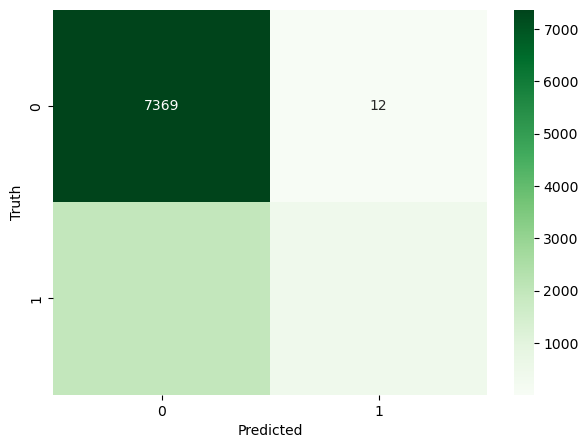

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cmd, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')

[Text(0.5, 0.8333333333333334, 'x[49] <= 0.5\nentropy = 0.792\nsamples = 39073\nvalue = [29774, 9299]'),
 Text(0.25, 0.5, 'x[4] <= 7055.5\nentropy = 0.341\nsamples = 21178\nvalue = [19835, 1343]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.277\nsamples = 20821\nvalue = [19825, 996]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.184\nsamples = 357\nvalue = [10, 347]'),
 Text(0.75, 0.5, 'x[4] <= 5095.5\nentropy = 0.991\nsamples = 17895\nvalue = [9939, 7956]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.969\nsamples = 16466\nvalue = [9927, 6539]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.07\nsamples = 1429\nvalue = [12, 1417]')]

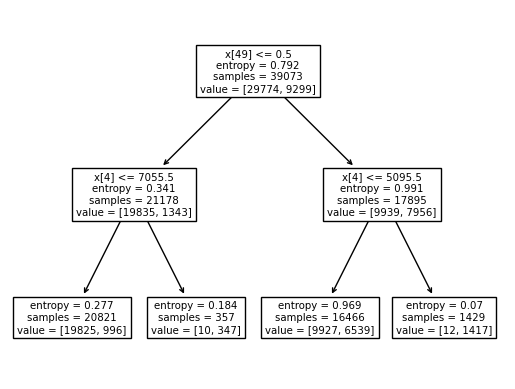

In [81]:
tree.plot_tree(model_d)

In [82]:
fn=[]
for i in x.columns:
    fn.append(i)
cn=['>50K','<=50K']

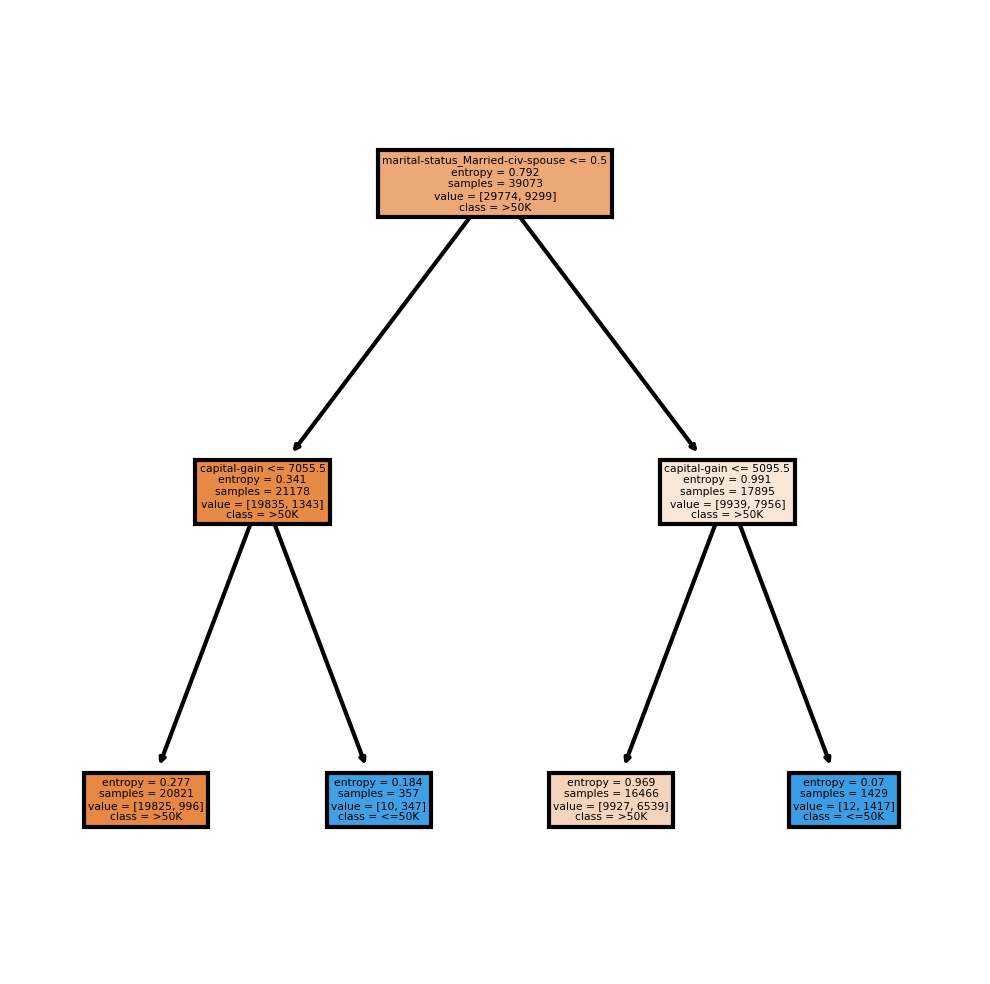

In [83]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_d,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
model_r = RandomForestClassifier(n_estimators=20)
model_r.fit(x_train, y_train)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(n_estimators=20)

In [85]:
y_pred=model_r.predict(x_test)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [86]:
accuracy_score(y_test,y_pred)

0.8499334629951889

In [87]:
cmr=confusion_matrix(y_test,y_pred)
cmr

array([[6854,  527],
       [ 939, 1449]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

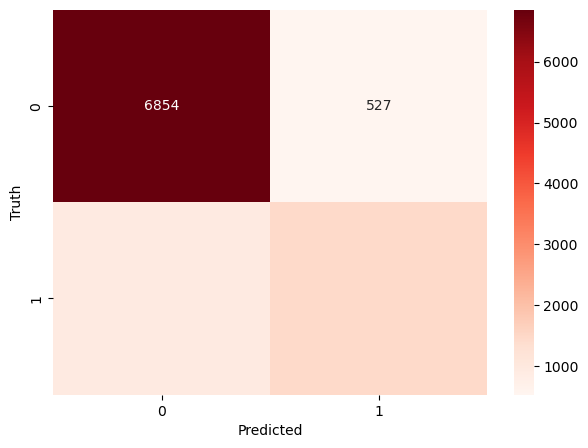

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cmr, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Support Vector Machine

In [90]:
from sklearn.svm import SVC
model_s = SVC()
model_s.fit(x_train, y_train)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC()

In [91]:
y_pred=model_s.predict(x_test)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [93]:
accuracy_score(y_test,y_pred)

0.7931210973487562

In [95]:
cms=confusion_matrix(y_test,y_pred)
cms

array([[7362,   19],
       [2002,  386]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

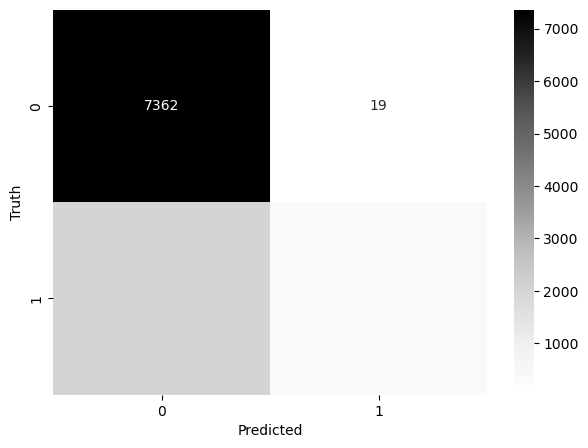

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(cms, annot=True, fmt='g', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# K-means

In [105]:
x=x.drop("income",axis="columns")

In [106]:
x[0:3]

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,77516,13,1,2174,0,40,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [98]:
from sklearn.cluster import KMeans

In [107]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

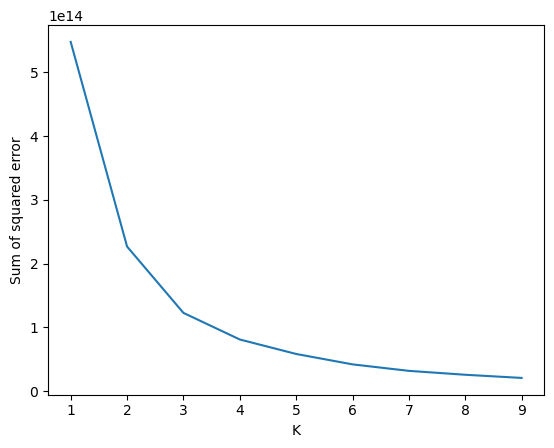

In [108]:
#ELBOW PLOT
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [133]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(x)

C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\babyk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

In [134]:
y_pred

array([2, 2, 0, ..., 1, 2, 0])

In [135]:
accuracy_score(y,y_pred)

0.4044674665247123